In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_name =  "D1.csv"
df = pd.read_csv(file_name)

In [14]:
df['cocaine'].unique()

array([nan,  1., -1.,  0.,  7.,  4.,  2.,  5., 23., 21., 20.,  6.,  3.,
       28., 16.,  9., 10., 22., 14., 15., 27., 25.])

# Task 1

### Listing data type (Before)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   survey_date             5789 non-null   object 
 1   region                  1562 non-null   object 
 2   country                 5786 non-null   object 
 3   ip_latitude             5789 non-null   float64
 4   ip_longitude            5789 non-null   float64
 5   gender                  5789 non-null   object 
 6   age                     5789 non-null   object 
 7   height                  5789 non-null   int64  
 8   weight                  5789 non-null   int64  
 9   bmi                     5789 non-null   float64
 10  blood_type              5689 non-null   object 
 11  insurance               4497 non-null   object 
 12  income                  4636 non-null   object 
 13  smoking                 5753 non-null   object 
 14  alcohol                 5751 non-null   

### Survey_date (Object -> datetime)

In [143]:
print(df['survey_date'].dtype)

object


Convert:

In [144]:
df['survey_date'] = pd.to_datetime(df['survey_date'], format='%d/%m/%Y')

In [145]:
print(df['survey_date'].dtype)

datetime64[ns]


### Height & Weight (int -> float)

In [146]:
print(df['height'].dtype)
print(df['weight'].dtype)

int64
int64


Convert:

In [147]:
df['height'] = df['height'].astype(float)
df['weight'] = df['weight'].astype(float)

In [148]:
print(df['height'].dtype)
print(df['weight'].dtype)

float64
float64


### Insurance (object -> integer)

In [149]:
print(df['insurance'].dtype)
print(df['insurance'].unique())

object
['yes' 'no' 'blank' nan]


Convert:

In [150]:
insurance_map = { 'yes': 1, 'no': 0, 'blank': -1, np.nan: -1 }
df['insurance'] = df['insurance'].map(insurance_map).astype(int)

Note: The reason why we convert 'blank' and Nan to the -1 is because there is no other meaning for a binary variable.

In [151]:
print(df['insurance'].dtype)
print(df['insurance'].unique())

int64
[ 1  0 -1]


### Alcohol & Cocaine (float -> int)

In [152]:
print(df['alcohol'].dtype)
print(df['cocaine'].dtype)

float64
float64


In [153]:
print(df['alcohol'].unique())
print(df['cocaine'].unique())

[ 0.  2. -1.  1. 12. 10.  3. 14.  4. 13.  6.  7.  5.  8.  9. 11. nan]
[nan  1. -1.  0.  7.  4.  2.  5. 23. 21. 20.  6.  3. 28. 16.  9. 10. 22.
 14. 15. 27. 25.]


Convert:

In [154]:
df['alcohol'] = df['alcohol'].astype('Int64')
df['cocaine'] = df['cocaine'].astype('Int64')

Note: there are Nan and -1 existing in the dataset so in order to distinguish two values, we decide to keep both types of value after converting. Using `"Int64"` instead of `int` can achieve what we want.

In [155]:
print(df['alcohol'].dtype)
print(df['cocaine'].dtype)

Int64
Int64


In [156]:
print(df['alcohol'].unique())
print(df['cocaine'].unique())

<IntegerArray>
[0, 2, -1, 1, 12, 10, 3, 14, 4, 13, 6, 7, 5, 8, 9, 11, <NA>]
Length: 17, dtype: Int64
<IntegerArray>
[<NA>, 1, -1, 0, 7, 4, 2, 5, 23, 21, 20, 6, 3, 28, 16, 9, 10, 22, 14, 15, 27,
 25]
Length: 22, dtype: Int64


### contacts_count & public_transport_count & Worried (float -> int)

In [157]:
print(df['contacts_count'].dtype)
print(df['public_transport_count'].dtype)
print(df['worried'].dtype)

float64
float64
float64


In [158]:
print(df['contacts_count'].unique())
print(df['public_transport_count'].unique())
print(df['worried'].unique())

[ 9.  2.  5.  6. 21. 10.  4.  0. 12.  1. 20.  8. 16.  3.  7. 15. 14. 19.
 13. 18. 11. 17. nan]
[ 0.  1.  5. 10.  2.  4.  6. 14.  3. 11.  8. 15. 13. 12.  7.  9. nan]
[ 3.  4.  2.  5.  1. nan]


Convert:

In [159]:
df['contacts_count'] = df['contacts_count'].fillna(-1).astype(int)
df['public_transport_count'] = df['public_transport_count'].fillna(-1).astype(int) 
df['worried'] = df['worried'].fillna(-1).astype(int) 

Note: Filling Nan with -1

In [160]:
print(df['contacts_count'].dtype)
print(df['public_transport_count'].dtype)
print(df['worried'].dtype)

int64
int64
int64


In [161]:
print(df['contacts_count'].unique())
print(df['public_transport_count'].unique())
print(df['worried'].unique())

[ 9  2  5  6 21 10  4  0 12  1 20  8 16  3  7 15 14 19 13 18 11 17 -1]
[ 0  1  5 10  2  4  6 14  3 11  8 15 13 12  7  9 -1]
[ 3  4  2  5  1 -1]


### Result

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   survey_date             5789 non-null   datetime64[ns]
 1   region                  1562 non-null   object        
 2   country                 5786 non-null   object        
 3   ip_latitude             5789 non-null   float64       
 4   ip_longitude            5789 non-null   float64       
 5   gender                  5789 non-null   object        
 6   age                     5789 non-null   object        
 7   height                  5789 non-null   float64       
 8   weight                  5789 non-null   float64       
 9   bmi                     5789 non-null   float64       
 10  blood_type              5689 non-null   object        
 11  insurance               5789 non-null   int64         
 12  income                  4636 non-null   object  

# Task 2

## 1) Identify and report the skewness present in the variables.

Skewness is identified for the numerical variables which are: 
- Height
- Weight
- BMI
- Alcohol 
- Cocaine
- Contacts Count (eliminating the -1 since it is Nan)
- Public transport count (eliminating the -1 since it is Nan)
- Risk Infection
- Risk mortality

An overview of skewness with skew() function:

In [163]:
# To include only the relevant numerical variables
numeric_variables = df[['height', 'weight', 'bmi', 'alcohol', 'cocaine', 'contacts_count', 
                      'public_transport_count', 'risk_infection', 'risk_mortality']]

# Filtering out rows where Contacts Count or Public Transport Count is -1 as a NaN
numeric_variables = numeric_variables[(numeric_variables['contacts_count'] != -1) & 
                                  (numeric_variables['public_transport_count'] != -1)]

# Identify skewness for the variables
skewness = numeric_variables.skew()
print(skewness)

height                   -0.461691
weight                    1.167586
bmi                       2.247121
alcohol                   1.912709
cocaine                   3.712043
contacts_count            0.969379
public_transport_count    5.682016
risk_infection            0.659022
risk_mortality            7.361453
dtype: Float64


### Data visualisation of skewness with histogram:

### Height

In [164]:
# Ignoring any future warnings
import warnings
warnings.filterwarnings("ignore")

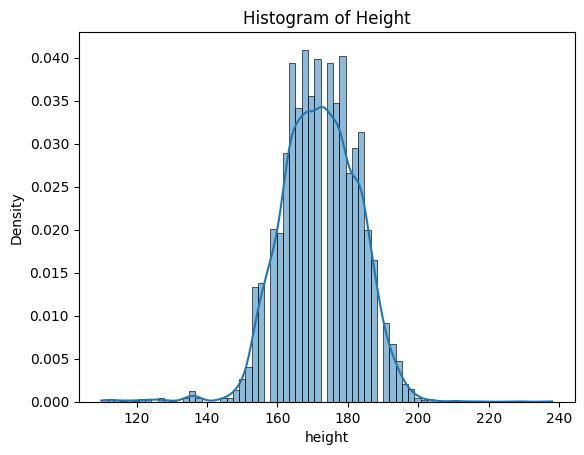

In [165]:
sns.histplot(df['height'], kde=True, stat='density')
plt.title(f'Histogram of Height')
plt.show()

### Weight

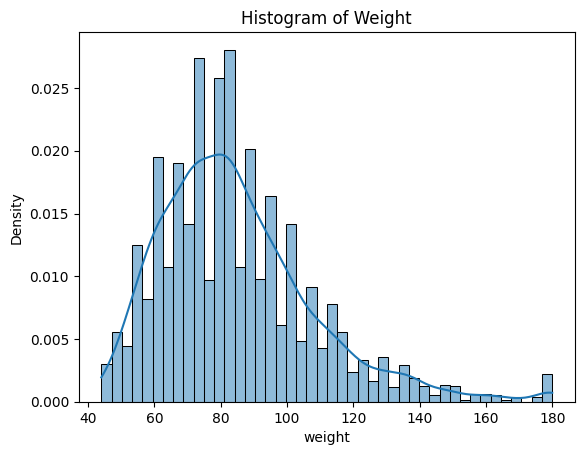

In [166]:
sns.histplot(df['weight'], kde=True, stat='density')
plt.title(f'Histogram of Weight')
plt.show()

### BMI

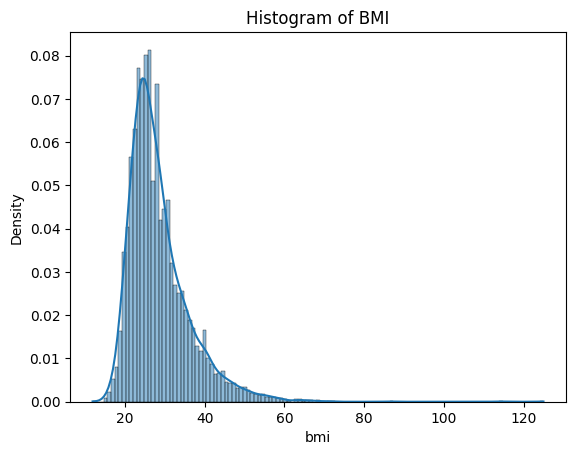

In [167]:
sns.histplot(df['bmi'], kde=True, stat='density')
plt.title(f'Histogram of BMI')
plt.show()

### Alcohol

The missing values NA are excluded in the histogram:

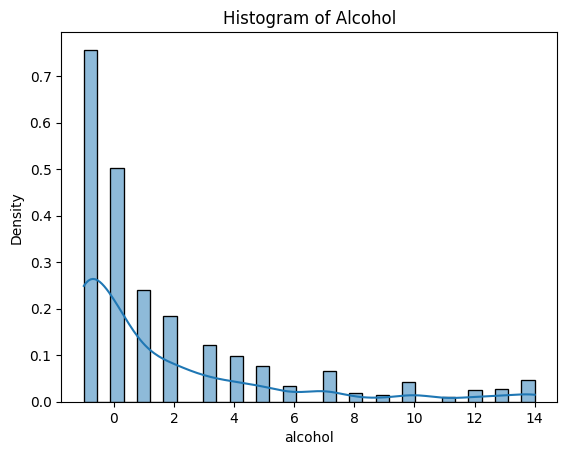

In [168]:
import pandas as pd

x = df[df['alcohol'] != np.nan]
x['alcohol'].unique()

x['alcohol'] = x['alcohol'].astype(int)
# x
sns.histplot(x['alcohol'], kde=True, stat='density')
plt.title(f'Histogram of Alcohol')
plt.show()

### Cocaine

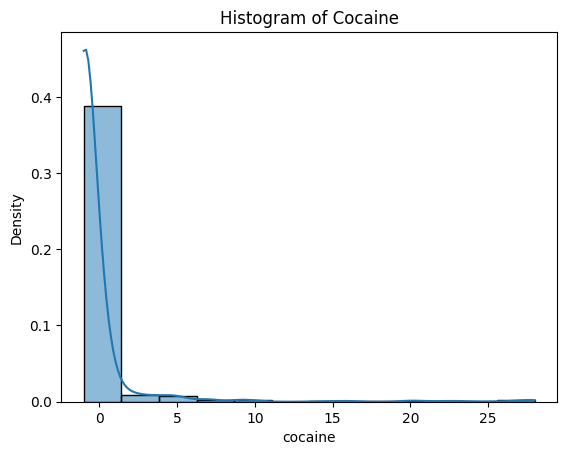

In [169]:
import pandas as pd

x = df[df['cocaine'] != np.nan]
x['cocaine'].unique()

x['cocaine'] = x['cocaine'].astype(int)
# x
sns.histplot(x['cocaine'], kde=True, stat='density')
plt.title(f'Histogram of Cocaine')
plt.show()

### Contacts count

The histogram takes into account the elimination of -1 which represents null value

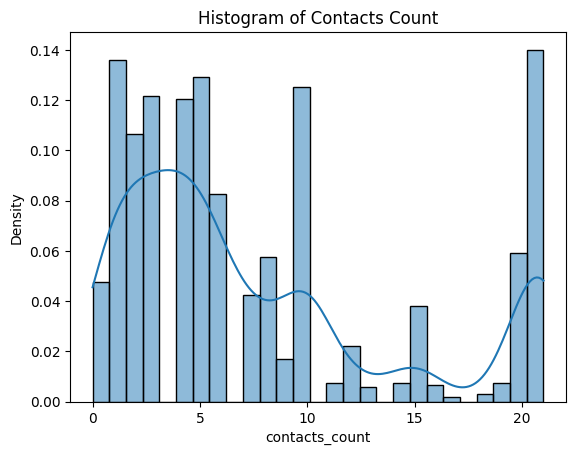

In [170]:
df_contactscount_cleaned = df[df['contacts_count'] != -1]

sns.histplot(df_contactscount_cleaned['contacts_count'], kde=True, stat='density')
plt.title(f'Histogram of Contacts Count')
plt.show()

### Public transport count

The histogram takes into account the elimination of -1 which represents null value

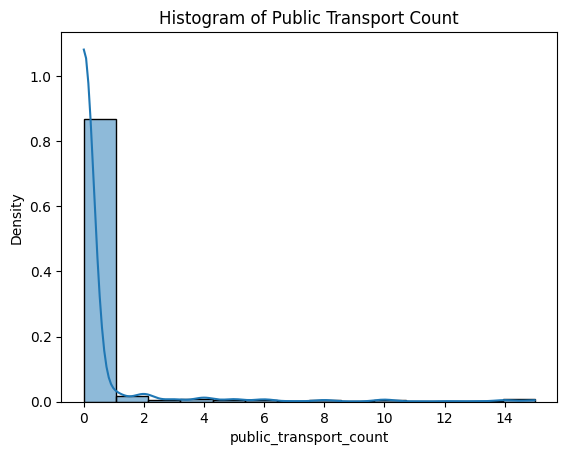

In [171]:
df_publictransportcount_cleaned = df[df['public_transport_count'] != -1]

sns.histplot(df_publictransportcount_cleaned['public_transport_count'], kde=True, stat='density')
plt.title(f'Histogram of Public Transport Count')
plt.show()

### Risk infection

#### (!!!) Based on the histogram, it shows a bimodal distribution, which means there is no skewness

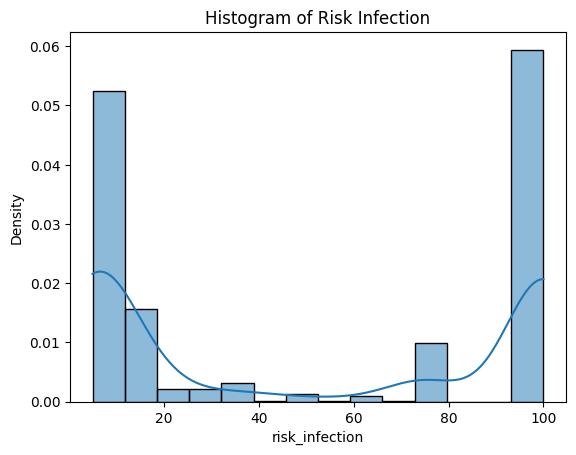

In [172]:
sns.histplot(df['risk_infection'], kde=True, stat='density')
plt.title(f'Histogram of Risk Infection')
plt.show()

### Risk mortality

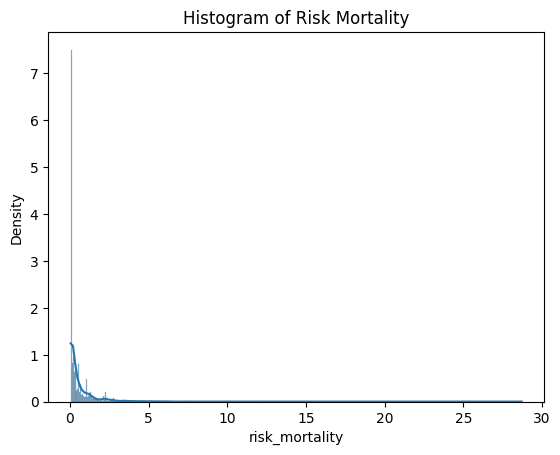

In [173]:
sns.histplot(df['risk_mortality'], kde=True, stat='density')
plt.title(f'Histogram of Risk Mortality')
plt.show()

## 2) Identify missing values, outliers, or errors in the data. List the variables with the identified problems.

### 2.1 Missing Values

The info() function shows that the total data count is 5789 but some variables has a lower total data count which indicates missing values. The variables are:
- region
- country
- blood type
- income
- smoking
- alcohol
- cocaine
- working

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   survey_date             5789 non-null   datetime64[ns]
 1   region                  1562 non-null   object        
 2   country                 5786 non-null   object        
 3   ip_latitude             5789 non-null   float64       
 4   ip_longitude            5789 non-null   float64       
 5   gender                  5789 non-null   object        
 6   age                     5789 non-null   object        
 7   height                  5789 non-null   float64       
 8   weight                  5789 non-null   float64       
 9   bmi                     5789 non-null   float64       
 10  blood_type              5689 non-null   object        
 11  insurance               5789 non-null   int64         
 12  income                  4636 non-null   object  

The total count of missing values is shown below:

In [175]:
missing_values = df.isnull().sum()
print(missing_values)

survey_date                  0
region                    4227
country                      3
ip_latitude                  0
ip_longitude                 0
gender                       0
age                          0
height                       0
weight                       0
bmi                          0
blood_type                 100
insurance                    0
income                    1153
smoking                     36
alcohol                     38
cocaine                   4359
contacts_count               0
public_transport_count       0
working                     42
worried                      0
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
liver_disease                0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_positive                 0
other_chronic                0
nursing_

To provide the evidence of missing values for each identified variables, the values are shown using the unique() function below

In [176]:
missingvalues_variables = ['region', 'country', 'blood_type', 'income', 'smoking', 'alcohol', 'cocaine', 'working']

for col in missingvalues_variables:
    if col in df.columns:
        print(col + ": " + str(df[col].unique()))
        print("=========================================")


region: ['AF' 'AS' 'EU' nan 'OC' 'SA']
country: ['ZA' 'EG' 'DZ' nan 'MU' 'AE' 'IN' 'BD' 'SA' 'IR' 'IL' 'QA' 'PK' 'TR' 'JP'
 'TH' 'ID' 'KR' 'KZ' 'SG' 'PH' 'BH' 'PS' 'MY' 'MM' 'HK' 'FR' 'BE' 'GB'
 'AT' 'IT' 'CH' 'RO' 'RU' 'MK' 'DE' 'HR' 'RS' 'BG' 'ES' 'NL' 'PT' 'IE'
 'NO' 'SE' 'LU' 'DK' 'GR' 'HU' 'SI' 'LT' 'PL' 'MT' 'MD' 'AD' 'CZ' 'BA'
 'FI' 'US' 'CA' 'MX' 'DO' 'SV' 'CR' 'GT' 'PA' 'KY' 'BM' 'HN' 'VI' 'PR'
 'NZ' 'AU' 'BR' 'CL' 'CO' 'AR' 'PE' 'EC' 'ET' 'MZ' 'IQ' 'AM' 'AZ' 'MO'
 'NP' 'SK' 'AW' 'BS' 'KE' 'GE' 'JE' 'LV' 'MA' 'UA']
blood_type: ['op' 'bp' 'unknown' 'ap' 'on' 'abp' 'an' 'abn' 'bn' nan]
income: ['med' 'low' 'high' 'gov' 'blank' nan]
smoking: ['never' 'yesmedium' 'quit0' 'quit10' 'quit5' 'yesheavy' 'yeslight' 'vape'
 nan]
alcohol: <IntegerArray>
[0, 2, -1, 1, 12, 10, 3, 14, 4, 13, 6, 7, 5, 8, 9, 11, <NA>]
Length: 17, dtype: Int64
cocaine: <IntegerArray>
[<NA>, 1, -1, 0, 7, 4, 2, 5, 23, 21, 20, 6, 3, 28, 16, 9, 10, 22, 14, 15, 27,
 25]
Length: 22, dtype: Int64
working: ['travel non

### 2.2 Outliers

Using the statistical approach, we identify the outliers through the comparison of mean, min values, and max values. The mean is sensitive to outliers, but the fact the mean is way too small compared to the max value or extremely higher than the min value indicates that outlier do exists.

In [177]:
df.describe()

,survey_date,ip_latitude,ip_longitude,height,weight,bmi,insurance,alcohol,cocaine,contacts_count,...,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
count,5789,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5751.0,1430.0,5789.000000,...,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000
mean,2020-07-07 17:38:10.343755264,33.054771,-64.963734,172.030057,84.773881,28.570116,0.331836,1.676926,-0.204895,7.764381,...,0.059596,0.031439,0.023320,0.081016,0.003973,0.065296,0.003628,0.084643,50.977198,0.562321
min,2020-03-24 00:00:00,-46.455100,-159.393400,110.000000,44.000000,11.900000,-1.000000,-1.0,-1.0,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.050000
25%,2020-06-03 00:00:00,32.835300,-96.861700,164.000000,68.000000,23.500000,-1.000000,-1.0,-1.0,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.050000
50%,2020-07-05 00:00:00,39.016300,-81.031000,172.000000,82.000000,26.800000,1.000000,0.0,-1.0,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.156000
75%,2020-07-07 00:00:00,42.451200,-58.313800,180.000000,96.000000,31.800000,1.000000,3.0,-1.0,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.599000
max,2020-12-15 00:00:00,64.682000,174.775800,238.000000,180.000000,125.000000,1.000000,14.0,28.0,21.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,28.698000
std,NaN,20.329514,54.434884,10.917600,23.576300,7.674528,0.884633,3.627425,3.010707,6.690779,...,0.236757,0.174516,0.150931,0.272883,0.062912,0.247069,0.060125,0.278374,44.027605,1.077849


The number of outliers on the relevant variables are shown below:

In [178]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers
    

### Height

In [179]:
outliers = find_outliers_IQR(df["height"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 51
max outlier value: 238.0
min outlier value: 110.0


27      138.0
59      124.0
63      122.0
65      118.0
169     122.0
613     136.0
768     112.0
816     210.0
923     112.0
1315    110.0
1324    112.0
1548    210.0
1586    134.0
1608    126.0
1775    134.0
1835    136.0
1905    128.0
1966    136.0
2199    124.0
2298    126.0
2480    130.0
3217    136.0
3240    138.0
3431    128.0
3464    114.0
3632    136.0
3673    118.0
3996    134.0
4046    136.0
4160    120.0
4169    110.0
4181    138.0
4239    136.0
4368    136.0
4482    138.0
4518    126.0
4642    136.0
4751    134.0
4755    216.0
4929    136.0
5158    138.0
5163    136.0
5261    114.0
5377    116.0
5420    238.0
5450    136.0
5547    136.0
5585    126.0
5636    228.0
5696    134.0
5783    122.0
Name: height, dtype: float64

To further support the evidence of outliers, we provide the data visualisation using a box plot 

In [180]:
import plotly.express as px
fig = px.box(df, y='height')
fig.update_layout(
    title="Box Plot of Height", 
    yaxis_title="Height" 
)
fig.show()

### Weight

In [181]:
outliers = find_outliers_IQR(df["weight"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 170
max outlier value: 180.0
min outlier value: 140.0


30      140.0
172     176.0
173     180.0
214     150.0
275     156.0
        ...  
5478    168.0
5479    146.0
5492    144.0
5521    180.0
5668    180.0
Name: weight, Length: 170, dtype: float64

In [182]:
fig = px.box(df, y='weight')
fig.update_layout(
    title="Box Plot of Weight", 
    yaxis_title="Weight" 
)
fig.show()

### BMI

In [183]:
outliers = find_outliers_IQR(df["bmi"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 258
max outlier value: 125.0
min outlier value: 44.3


30      47.3
59      50.7
169     57.7
172     67.0
173     58.1
        ... 
5598    48.1
5604    48.8
5635    51.0
5668    55.5
5696    50.1
Name: bmi, Length: 258, dtype: float64

In [184]:
fig = px.box(df, y='bmi')
fig.update_layout(
    title="Box Plot of BMI", 
    yaxis_title="BMI" 
)
fig.show()

### Alcohol

In [185]:
outliers = find_outliers_IQR(df["alcohol"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 388
max outlier value: 14
min outlier value: 10


8       12
10      10
11      10
14      14
24      13
        ..
5738    13
5741    12
5756    12
5773    14
5783    12
Name: alcohol, Length: 388, dtype: Int64

In [186]:
fig = px.box(df, y='alcohol')
fig.update_layout(
    title="Box Plot of Alcohol", 
    yaxis_title="Alcohol" 
)
fig.show()

### Cocaine

In [187]:
outliers = find_outliers_IQR(df["cocaine"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 352
max outlier value: 28
min outlier value: 0


8       1
55      0
127     1
169     7
187     1
       ..
5741    0
5747    0
5748    0
5767    0
5770    0
Name: cocaine, Length: 352, dtype: Int64

In [188]:
fig = px.box(df, y='cocaine')
fig.update_layout(
    title="Box Plot of Cocaine", 
    yaxis_title="Cocaine" 
)
fig.show()

### Contacts Count

In [189]:
#Excluding the -1 which represents an NaN value
df_excluded_minus1 = df[df["contacts_count"] != -1]

In [190]:
outliers = find_outliers_IQR(df_excluded_minus1["contacts_count"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 626
max outlier value: 21
min outlier value: 21


6       21
19      21
22      21
31      21
38      21
        ..
5771    21
5772    21
5775    21
5777    21
5782    21
Name: contacts_count, Length: 626, dtype: int64

In [191]:
fig = px.box(df_excluded_minus1, y='contacts_count')
fig.update_layout(
    title="Box Plot of Contacts Count", 
    yaxis_title="Contacts Count" 
)
fig.show()

### Public Transport Count

In [192]:
#Excluding the -1 which represents an NaN value
df_excluded_minus1 = df[df["public_transport_count"] != -1]

In [193]:
outliers = find_outliers_IQR(df_excluded_minus1["public_transport_count"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 410
max outlier value: 15
min outlier value: 1


6        1
23       5
24       1
26      10
29       1
        ..
4748     8
4755    11
5672     2
5673     2
5674     4
Name: public_transport_count, Length: 410, dtype: int64

In [194]:
fig = px.box(df_excluded_minus1, y='public_transport_count')
fig.update_layout(
    title="Box Plot of Public Transport Count", 
    yaxis_title="Public Transport Count" 
)
fig.show()

### Risk Mortality

In [195]:
outliers = find_outliers_IQR(df["risk_mortality"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 595
max outlier value: 28.698
min outlier value: 1.424


6        1.527
20       4.256
46       1.884
52       2.273
59       4.540
         ...  
5665     2.707
5667     3.094
5688     2.250
5696    17.411
5709     4.411
Name: risk_mortality, Length: 595, dtype: float64

In [196]:
fig = px.box(df, y='risk_mortality')
fig.update_layout(
    title="Box Plot of Risk Mortality", 
    yaxis_title="Risk Mortality" 
)
fig.show()

### Risk Infection

In [197]:
outliers = find_outliers_IQR(df["risk_infection"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: risk_infection, dtype: float64)

In [198]:
fig = px.box(df, y='risk_infection')
fig.update_layout(
    title="Box Plot of Risk Infection", 
    yaxis_title="Risk Infection" 
)
fig.show()

### IP Latitude

In [199]:
outliers = find_outliers_IQR(df["ip_latitude"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 673
max outlier value: 64.682
min outlier value: -46.4551


0      -33.9052
1      -26.1891
2      -27.9752
3      -26.3227
4      -29.8587
         ...   
5783   -21.2349
5784   -22.2103
5785   -19.8898
5786   -19.8543
5787   -22.9562
Name: ip_latitude, Length: 673, dtype: float64

In [200]:
fig = px.box(df, y='ip_latitude')
fig.update_layout(
    title="Box Plot of IP Latitude", 
    yaxis_title="IP Latitude" 
)
fig.show()

### IP Longitude

In [201]:
outliers = find_outliers_IQR(df["ip_longitude"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 924
max outlier value: 174.7758
min outlier value: -159.3934


0        18.3821
1        28.0225
2        27.1068
3        28.1050
4        31.0653
          ...   
5667    151.2898
5668    174.7758
5669    145.0067
5670    151.1137
5788     -0.1807
Name: ip_longitude, Length: 924, dtype: float64

In [202]:
fig = px.box(df, y='ip_longitude')
fig.update_layout(
    title="Box Plot of IP Longitude", 
    yaxis_title="IP Longitude" 
)
fig.show()

### 2.3 Data Errors 

In [203]:
df['region'].unique() #incomplete data (NaN)

array(['AF', 'AS', 'EU', nan, 'OC', 'SA'], dtype=object)

In [204]:
df['country'].unique() #incomplete data (NaN)

array(['ZA', 'EG', 'DZ', nan, 'MU', 'AE', 'IN', 'BD', 'SA', 'IR', 'IL',
       'QA', 'PK', 'TR', 'JP', 'TH', 'ID', 'KR', 'KZ', 'SG', 'PH', 'BH',
       'PS', 'MY', 'MM', 'HK', 'FR', 'BE', 'GB', 'AT', 'IT', 'CH', 'RO',
       'RU', 'MK', 'DE', 'HR', 'RS', 'BG', 'ES', 'NL', 'PT', 'IE', 'NO',
       'SE', 'LU', 'DK', 'GR', 'HU', 'SI', 'LT', 'PL', 'MT', 'MD', 'AD',
       'CZ', 'BA', 'FI', 'US', 'CA', 'MX', 'DO', 'SV', 'CR', 'GT', 'PA',
       'KY', 'BM', 'HN', 'VI', 'PR', 'NZ', 'AU', 'BR', 'CL', 'CO', 'AR',
       'PE', 'EC', 'ET', 'MZ', 'IQ', 'AM', 'AZ', 'MO', 'NP', 'SK', 'AW',
       'BS', 'KE', 'GE', 'JE', 'LV', 'MA', 'UA'], dtype=object)

In [205]:
df['smoking'].unique() #incomplete data (NaN)

array(['never', 'yesmedium', 'quit0', 'quit10', 'quit5', 'yesheavy',
       'yeslight', 'vape', nan], dtype=object)

##### REFER TO TASK 2.1 LINE 121 FOR MORE VARIABLES THAT HAS MISSING VALUES

In [206]:
df['income'].unique() #noisy data: blank and nan

array(['med', 'low', 'high', 'gov', 'blank', nan], dtype=object)

In [207]:
df['blood_type'].unique() #noisy data: unknown and nan

array(['op', 'bp', 'unknown', 'ap', 'on', 'abp', 'an', 'abn', 'bn', nan],
      dtype=object)

In [208]:
df['insurance'].unique() #noisy data: initially before data cleaning it contains yes, no, blank, nan. Refer to LINE [94] for Insurance's data error

array([ 1,  0, -1])

In [209]:
#Below shows an inconsistency in which contacts counts is lower than public transport count

In [210]:
df.loc[df['contacts_count'] < df['public_transport_count'] , ['survey_date', 'contacts_count', 'public_transport_count']]

,survey_date,contacts_count,public_transport_count
26,2020-07-04,5,10
69,2020-06-22,3,6
74,2020-06-30,3,4
90,2020-07-06,10,14
135,2020-07-06,0,1
...,...,...,...
4439,2020-07-05,0,1
4524,2020-12-03,3,4
4710,2020-12-03,5,6
5672,2020-12-03,1,2


# Task 3

## 1) Summary findings from data exploration task  



The variables that need to be addressed are:

1. Inconsistent data
    - contacts_count: not consistent with public_transport_count ✅
1. Noisy data 
    - blood_type: contains 'unknown' ✅
    - income: contains 'blank' ✅
    - insurance: contains 'blank' ✅
1. Incomplete (missing) data
    - country ✅
    - region ✅
    - blood_type ✅
    - income  ✅
    - insurance ✅
    - smoking ✅
    - contacts_count ✅
    - public_transport_count ✅
    - worried ✅
    - alcohol ✅
    - cocaine ✅

## 2) Data Cleaning

### 👉🏻 contacts_count

#### Missing data

Since the variable contains many outliers, we here replace all missing data with "mediun".

In [211]:
df['contacts_count'].value_counts()

contacts_count
 21    626
 1     608
 5     577
 10    560
 3     543
 4     538
 2     476
 6     370
 20    265
 8     257
 0     213
 7     190
 15    171
 12     99
 9      76
-1      42
 14     34
 19     34
 11     33
 16     29
 13     26
 18     14
 17      8
Name: count, dtype: int64

In [212]:
median = df.loc[df['contacts_count'] != -1, 'contacts_count'].median()
print(median)
df.loc[df['contacts_count'] == -1, 'contacts_count'] = median

5.0


In [213]:
# check again:
df['contacts_count'].value_counts()

contacts_count
21    626
5     619
1     608
10    560
3     543
4     538
2     476
6     370
20    265
8     257
0     213
7     190
15    171
12     99
9      76
14     34
19     34
11     33
16     29
13     26
18     14
17      8
Name: count, dtype: int64

#### Inconsistency
The variables show inconsistency because some values of 'contacts_count' are smaller than the corresponding values of 'public_transport_count'.

In [214]:
rest = df.loc[df['contacts_count'] < df['public_transport_count'] , ['contacts_count', 'public_transport_count']]
rest

,contacts_count,public_transport_count
26,5,10
69,3,6
74,3,4
90,10,14
135,0,1
...,...,...
4439,0,1
4524,3,4
4710,5,6
5672,1,2


#### 👨🏼‍🔬 Experiemnt (🚨 dont put this in the report !!)

As shown in the table, there are 65 records that are inconsistent. To solve this problem, the easiest way is to add the value of 'public_transport_count' to that of 'contacts_count'. However, we cannot direclty apply this to the all the data since some of the 'contacts_count' value are not 0. This is more accurate than simply replacing all values with their means, which will be apply to the rest of 'contacts_count' (those who are not 0).

!!! update: might keep this simple !!!


*\<maybe place a flow diagram here\>*


 Hence, we first address the 0 values:

In [215]:
# # address 0 values of "contacts_count" first
# df['contacts_count'] = df[['contacts_count','public_transport_count']]. \
#                             sum(axis=1).\
#                             where((df['contacts_count'] == 0) & (df['public_transport_count'] > 0), df['contacts_count'])

In [216]:
# # Check again:
# rest = df.loc[(df['contacts_count'] < df['public_transport_count']),
#        ['contacts_count', 'public_transport_count']]
# rest.count()

In [217]:
# rest

Now, we have 57 records left. To address the rest of the records, we calculate the means of 'contacts_count' based on each 'public_transport_count'. Then we simply replace the rest of 'contacts_count' with the mean.

#### ---

Method: 
Replacing all incorrect values with the corresponding means. e.g. when public_transport_count=10 has a mean value of 'contacts_count'=16, fill in 16. 

In [218]:
for pt_c in rest['public_transport_count'].unique():
    # 1. get all correct data
    x = df.loc[(df['public_transport_count'] == pt_c) & (df['contacts_count'] >= df['public_transport_count']), 'contacts_count']
    # 2. calculate its mean
    c_c_avg = int(x.mean())
    # 3. update
    df.loc[(df['public_transport_count'] == pt_c) & (df['contacts_count'] < df['public_transport_count'] ), 'contacts_count'] = c_c_avg

    print('public_transport_count: ' + str(pt_c) + ', Average contacts_count: ' + str(c_c_avg))

public_transport_count: 10, Average contacts_count: 16
public_transport_count: 6, Average contacts_count: 15
public_transport_count: 4, Average contacts_count: 9
public_transport_count: 14, Average contacts_count: 19
public_transport_count: 1, Average contacts_count: 7
public_transport_count: 5, Average contacts_count: 11
public_transport_count: 15, Average contacts_count: 21
public_transport_count: 12, Average contacts_count: 19
public_transport_count: 2, Average contacts_count: 10
public_transport_count: 8, Average contacts_count: 15
public_transport_count: 9, Average contacts_count: 10
public_transport_count: 13, Average contacts_count: 20
public_transport_count: 7, Average contacts_count: 17
public_transport_count: 3, Average contacts_count: 11
public_transport_count: 11, Average contacts_count: 16


In [219]:
# Check again:
# returning 0 means there is no incorrect records.

df.loc[(df['contacts_count'] < df['public_transport_count'] ), 'contacts_count'].count()

0

### 👉🏻 public_transport_count

#### Missing data

Same as 'contacts_count', replace all missing data with "mediun".

In [221]:
df['public_transport_count'].value_counts()

public_transport_count
 0     4162
-1     1217
 1      101
 2       89
 4       46
 5       28
 6       26
 3       26
 10      23
 8       18
 14      17
 15      16
 13       5
 12       5
 7        5
 11       3
 9        2
Name: count, dtype: int64

In [222]:
median = df.loc[df['public_transport_count'] != -1, 'public_transport_count'].median()
print(median)
df.loc[df['public_transport_count'] == -1, 'public_transport_count'] = median

0.0


In [223]:
# check again:
df['public_transport_count'].value_counts()

public_transport_count
0     5379
1      101
2       89
4       46
5       28
6       26
3       26
10      23
8       18
14      17
15      16
13       5
12       5
7        5
11       3
9        2
Name: count, dtype: int64

### 👉🏻 blood_type

#### Missing data

convert them to 'unknown'

In [225]:
df.loc[df['blood_type'].isna(), 'blood_type'] = 'unknown'

In [226]:
# check:
df['blood_type'].unique()

array(['op', 'bp', 'unknown', 'ap', 'on', 'abp', 'an', 'abn', 'bn'],
      dtype=object)

#### Noisy data

The variable contains 'unknown'

Solution: equaully distribute the data based on the ratio

In [227]:
np.random.seed(42)
def pick_value(ratio, values):
    total_parts = sum(ratio)
    normalized_ratio = [part / total_parts for part in ratio]
    selected_value = np.random.choice(values, p=normalized_ratio)
    return selected_value

In [228]:
correct_blood_type_data = df.loc[df['blood_type'] != 'unknown', 'blood_type']
ratio = correct_blood_type_data.value_counts()/len(correct_blood_type_data)
ratio

blood_type
ap     0.327529
op     0.320359
on     0.106786
bp     0.100896
an     0.062484
abp    0.048912
bn     0.023303
abn    0.009731
Name: count, dtype: float64

In [229]:
blood_types = ratio.index.tolist()
ratio = ratio.values.tolist()

In [230]:
blood_types

['ap', 'op', 'on', 'bp', 'an', 'abp', 'bn', 'abn']

In [231]:
ratio

[0.32752880921895006,
 0.3203585147247119,
 0.10678617157490397,
 0.10089628681177977,
 0.06248399487836107,
 0.048911651728553135,
 0.023303457106274007,
 0.009731113956466069]

In [232]:
# before:
df['blood_type'].value_counts()

blood_type
unknown    1884
ap         1279
op         1251
on          417
bp          394
an          244
abp         191
bn           91
abn          38
Name: count, dtype: int64

In [233]:
update_data = []
for _ in range(len(df.loc[df['blood_type'] == 'unknown'].index)):
    update_data.append(pick_value(ratio, blood_types))

df.loc[df['blood_type'] == 'unknown', 'blood_type'] = update_data

In [234]:
# check
df['blood_type'].value_counts()

blood_type
ap     1908
op     1839
on      614
bp      577
an      367
abp     287
bn      142
abn      55
Name: count, dtype: int64

### 👉🏻 insurance

#### Noisy data

This part has been covered in Task 1.

#### Missing data 

In [236]:
df['insurance'].value_counts()

insurance
 1    3544
-1    1623
 0     622
Name: count, dtype: int64

To fill up the missing values, we are going to consider other two variables, 'worried' and 'income', because might be the most potential candidates to affect 'insurance'.

We draw heat maps to see their correlations, and the result shows that both variables seem to be having clearer correlations with 'insurance'.

In [237]:
def draw_correlation_map(x, y, xname, yname):
    cross_table = pd.crosstab(x, y)
    cross_table = cross_table.sort_index(axis=0)
    cross_table = cross_table.sort_index(axis=1)
    sns.heatmap(cross_table, annot=True, cmap='Blues')
    plt.ylabel(xname)
    plt.xlabel(yname)
    plt.show()

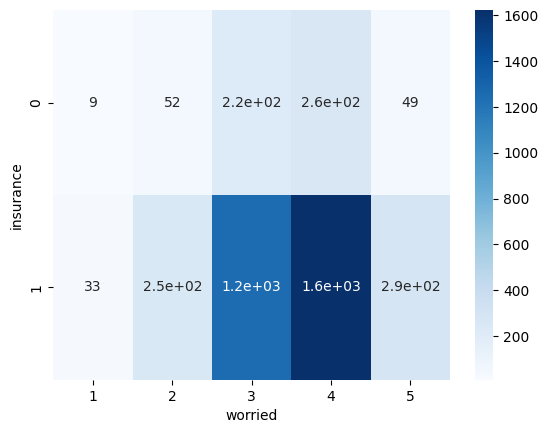

In [238]:
# insurance v.s. worried 
x = df.loc[df['insurance'] != -1, 'insurance']
y = df.loc[df['worried'] != -1,'worried']
draw_correlation_map(x, y, 'insurance', 'worried')

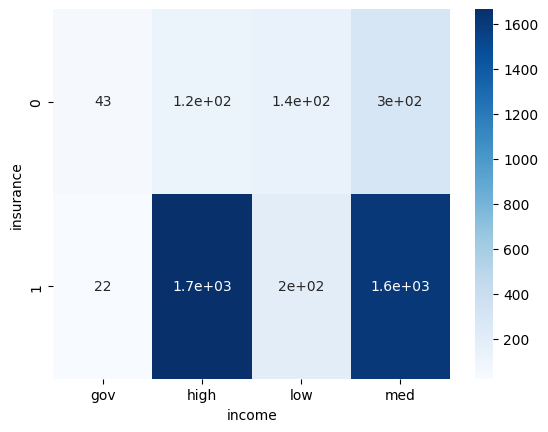

In [239]:
# insurance v.s. income 
x = df.loc[df['insurance'] != -1, 'insurance']
y = df.loc[df['income'] != 'blank','income']
draw_correlation_map(x, y, 'insurance', 'income')

Now we can fill in the missing value based on the rules:

1. If income is 'med' or 'high', or if worried is 3 or 4, fill in 1 for insurance
1. Otherwise, fill in 0 for insurance

In [240]:
data_update_to_1 = df.loc[
        ((df['income'].isin(['high', 'med'])) | (df['worried'].isin([3,4]))) &
        (df['insurance'] == -1)
        , ['insurance','income', 'worried']
    ]

In [241]:
print("count: ", data_update_to_1['insurance'].count())
print(data_update_to_1)

count:  459
      insurance income  worried
4166         -1    med        3
4167         -1    med        4
4168         -1    med        3
4169         -1    low        3
4170         -1    med        4
...         ...    ...      ...
5678         -1   high        4
5679         -1  blank        4
5785         -1    NaN        4
5786         -1    NaN        3
5787         -1    NaN        3

[459 rows x 3 columns]


In [242]:
# update to 1
df.loc[
        ((df['income'].isin(['high', 'med'])) | (df['worried'].isin([3,4]))) &
        (df['insurance'] == -1)
        , ['insurance']
    ] = 1

In [243]:
# check
df['insurance'].value_counts()

insurance
 1    4003
-1    1164
 0     622
Name: count, dtype: int64

In [244]:
# update the rest to 0
df.loc[df['insurance'] == -1, 'insurance'] = 0

In [245]:
# check again
df['insurance'].value_counts()

insurance
1    4003
0    1786
Name: count, dtype: int64

### 👉🏻 income

#### Missing data

In [247]:
df['income'].value_counts()

income
med      2142
high     1886
low       398
blank     122
gov        88
Name: count, dtype: int64

Convert all NaN value to 'blank'.

In [248]:
df.loc[df['income'].isna(), 'income'] = 'blank'

In [249]:
# check
df['income'].value_counts()

income
med      2142
high     1886
blank    1275
low       398
gov        88
Name: count, dtype: int64

#### Noisy data

For the blank data, we here calculate the ratio of the variable and fill in values based on it 

In [250]:
correct_income_data = df.loc[df['income'] != 'blank', 'income']
ratio = correct_income_data.value_counts()/len(correct_income_data)
ratio


income
med     0.474524
high    0.417811
low     0.088170
gov     0.019495
Name: count, dtype: float64

In [251]:
income_levels = ratio.index.tolist()
ratio = ratio.values.tolist()

In [252]:
update_data = []
for v in df.loc[df['income'] == 'blank', 'income']:
    update_data.append(pick_value(ratio, income_levels))

df.loc[df['income'] == 'blank', 'income'] = update_data
    

In [253]:
# check
df.loc[df['income'] == 'blank', 'income']

Series([], Name: income, dtype: object)

In [111]:
df['income'].value_counts()

income
med     2749
high    2422
low      508
gov      110
Name: count, dtype: int64

### 👉🏻 Country

#### MIssing data
convert nan to 'US'

In [255]:
df['country'].unique()

array(['ZA', 'EG', 'DZ', nan, 'MU', 'AE', 'IN', 'BD', 'SA', 'IR', 'IL',
       'QA', 'PK', 'TR', 'JP', 'TH', 'ID', 'KR', 'KZ', 'SG', 'PH', 'BH',
       'PS', 'MY', 'MM', 'HK', 'FR', 'BE', 'GB', 'AT', 'IT', 'CH', 'RO',
       'RU', 'MK', 'DE', 'HR', 'RS', 'BG', 'ES', 'NL', 'PT', 'IE', 'NO',
       'SE', 'LU', 'DK', 'GR', 'HU', 'SI', 'LT', 'PL', 'MT', 'MD', 'AD',
       'CZ', 'BA', 'FI', 'US', 'CA', 'MX', 'DO', 'SV', 'CR', 'GT', 'PA',
       'KY', 'BM', 'HN', 'VI', 'PR', 'NZ', 'AU', 'BR', 'CL', 'CO', 'AR',
       'PE', 'EC', 'ET', 'MZ', 'IQ', 'AM', 'AZ', 'MO', 'NP', 'SK', 'AW',
       'BS', 'KE', 'GE', 'JE', 'LV', 'MA', 'UA'], dtype=object)

In [256]:
df['country'].isna().sum()

3

In [257]:
df.loc[df['country'].isna(), ['region','country']]

,region,country
12,AF,NaN
3543,NaN,NaN
5788,NaN,NaN


We can see there is a nan value in the region of AF. Before filling up US to all nan value, we can randomly fill in a country code that is in AF region for this specific record.

here we fill in the most frequent country in AF.

In [258]:
region_mode = df.loc[(df['region'] == 'AF') , 'country'].mode()[0]
df.loc[(df['country'].isna()) & (df['region'] == 'AF'), ['country']] = region_mode

In [259]:
# check
df.loc[df['country'].isna(), ['region','country']]

,region,country
3543,NaN,NaN
5788,NaN,NaN


now address the rest

In [260]:
country_mode = df['country'].mode()[0]
df.loc[df['country'].isna(), 'country'] = country_mode

In [261]:
df['country'].isna().sum()

0

### 👉🏻 Region

#### Missing data

refer to the website: 

In [263]:
df['region'].unique()

array(['AF', 'AS', 'EU', nan, 'OC', 'SA'], dtype=object)

In [264]:
# replace nan with 'NA' representing "North America" 
df.loc[df['region'].isna(), 'region'] = 'NA'

In [265]:
# check
df['region'].unique()

array(['AF', 'AS', 'EU', 'NA', 'OC', 'SA'], dtype=object)

In [266]:
df['region'].value_counts()

region
NA    4227
EU     801
SA     399
AS     206
AF      79
OC      77
Name: count, dtype: int64

### 👉🏻 smoking 

#### Missing data

S: convert it to 'never' (mode)

In [268]:
df['smoking'].unique()

array(['never', 'yesmedium', 'quit0', 'quit10', 'quit5', 'yesheavy',
       'yeslight', 'vape', nan], dtype=object)

In [269]:
df['smoking'].value_counts()

smoking
never        3713
quit5         485
quit10        473
quit0         319
vape          247
yesmedium     230
yeslight      206
yesheavy       80
Name: count, dtype: int64

In [270]:
df['smoking'].isna().sum()

36

In [271]:
smoking_mode = df['smoking'].mode()[0]
df.loc[df['smoking'].isna(), 'smoking'] = smoking_mode

In [272]:
# check
df['smoking'].isna().sum()

0

### 👉🏻 worried

#### missing data

we have convert nan values in task one. (interval)


replace -1 with 4 (mode)

In [274]:
df['worried'].unique() # already converted nan to -1

array([ 3,  4,  2,  5,  1, -1])

In [275]:
df['worried'].value_counts()

worried
 4    2079
 3    1674
-1    1271
 5     377
 2     342
 1      46
Name: count, dtype: int64

In [276]:
mode_worried = df['worried'].mode()[0]
print("mode: ", mode_worried)
df.loc[df['worried'] == -1, 'worried'] = mode_worried

mode:  4


In [278]:
# check:
df['worried'].value_counts()

worried
4    3350
3    1674
5     377
2     342
1      46
Name: count, dtype: int64

### 👉🏻 alcohol / cocaine

#### missing data

this is interval (category) data, so replace all missing values with mode().

In [279]:
print(df['alcohol'].isna().sum())
print(df['cocaine'].isna().sum())

38
4359


In [280]:
print(df['alcohol'].unique())
print(df['cocaine'].unique())

<IntegerArray>
[0, 2, -1, 1, 12, 10, 3, 14, 4, 13, 6, 7, 5, 8, 9, 11, <NA>]
Length: 17, dtype: Int64
<IntegerArray>
[<NA>, 1, -1, 0, 7, 4, 2, 5, 23, 21, 20, 6, 3, 28, 16, 9, 10, 22, 14, 15, 27,
 25]
Length: 22, dtype: Int64


In [281]:
print(df['alcohol'].value_counts())
print(df['cocaine'].value_counts())

alcohol
-1    1920
0     1275
1      612
2      466
3      310
4      247
5      194
7      166
14     117
10     108
6       86
13      72
12      64
8       48
9       39
11      27
Name: count, dtype: Int64
cocaine
-1    1078
0      228
1       33
2       17
5       14
4       12
3       12
7        7
9        5
28       4
27       3
10       3
20       3
6        2
16       2
23       2
21       1
22       1
14       1
15       1
25       1
Name: count, dtype: Int64


In [282]:
# get modes:
alcohol_mode = df['alcohol'].mode()[0]
cocaine_mode = df['cocaine'].mode()[0]
print(alcohol_mode)
print(cocaine_mode)

-1
-1


In [283]:
# update
df.loc[df['alcohol'].isna(), 'alcohol'] = alcohol_mode
df.loc[df['cocaine'].isna(), 'cocaine'] = cocaine_mode

In [284]:
# check
print(df['alcohol'].isna().sum())
print(df['cocaine'].isna().sum())

0
0


In [285]:
df['smoking'].unique()

array(['never', 'yesmedium', 'quit0', 'quit10', 'quit5', 'yesheavy',
       'yeslight', 'vape'], dtype=object)

## 3) Data Transformation

no thought yet ...